# Loading data

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [533]:
user = pd.read_csv("dataset_iau/user.csv", sep='\t')
session = pd.read_csv("dataset_iau/session.csv", sep='\t')
product = pd.read_csv("dataset_iau/product.csv", sep='\t')

In [534]:
product.head()

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila


In [535]:
user.head()

,residence,sex,username,user_id,address,birthdate,race,job,name,current_location,mail
0,NaN,F,vigorellimatilda,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",1917-03-25,NaN,NaN,Gemma Baracca,NaN,cesarecagnotto@tim.it
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,matsumotoasuka,298,三重県西東京市上広谷3丁目27番1号,NaN,NaN,演歌歌手,近藤 翼,"(Decimal('44.4329015'), Decimal('-94.188145'))",nakajimaatsushi@yahoo.com
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,debra19,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868",1985-05-21,white,Tourism officer,Belinda Harvey,"(Decimal('17.674891'), Decimal('43.063751'))",kevindeleon@yahoo.com
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,udineseimelda,2538,NaN,2012-01-02,asian,NaN,Sig.ra Susanna Roero,"(Decimal('-65.4578585'), Decimal('-162.734373'))",federicacaccioppoli@tele2.it
4,NaN,NaN,debra72,590,USCGC Kim\r\nFPO AA 25581,NaN,white,NaN,Deborah Larson,"(Decimal('-67.907028'), Decimal('-104.061594'))",stevendavis@yahoo.com


In [536]:
session.head()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937


# Analysis of the data structures

We are working with the dataset 70. It contains 3 files: product.csv, session.csv, user.csv (csv - comma-separated values).

### FILE product.csv

The file associates products with the stores that sell them and lists the locations of those stores. It is 613 KB long and contains 4 columns.

In [537]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14958 entries, 0 to 14957
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_ean  14958 non-null  int64 
 1   code         14941 non-null  object
 2   store_name   14958 non-null  object
 3   location     14958 non-null  object
dtypes: int64(1), object(3)
memory usage: 467.6+ KB


### FILE user.csv

The file provides details of the users observed, such as their permanent residence, gender, date of birth, occupation. It is 446 KB and contains 11 columns.)

In [538]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   residence         890 non-null    object
 1   sex               1271 non-null   object
 2   username          2542 non-null   object
 3   user_id           2542 non-null   int64 
 4   address           2161 non-null   object
 5   birthdate         1398 non-null   object
 6   race              763 non-null    object
 7   job               1017 non-null   object
 8   name              2542 non-null   object
 9   current_location  2415 non-null   object
 10  mail              2542 non-null   object
dtypes: int64(1), object(10)
memory usage: 218.6+ KB


### FILE session.csv

The file contains details of individual user sessions. It provides various details, in particular information on whether the session ended with a product purchase (ack), the identifier of the user who attended the session (user_id) and the identifier of the product (product_ean) that was involved. In addition, it also describes, for example, the length of the session, the screen size of the device or the speed of the user's mouse movement. It is 2.26 MB and contains 25 columns.

In [539]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   screen_width                    11089 non-null  object 
 7   pct_click                       11078 non-null  float64
 8   browser_name                    11089 non-null  object 
 9   pct_mouse_move                  11078 non-null  float64
 10  pct_click_product_info          11078 non-null  float64
 11  pct_scroll_move_duration        11078 non-null  float64
 12  pct_scrandom                    

# IDENTIFING PROBLEMS IN DATA (WITH PARTIAL SOLUTION)

## FIRST SEEN:

***In the provided date consisting of three datasets, we can find problems of the following types:***

   **USER**
    
   1. From the output of the first rows of the **user table**, we can see that some rows are written in **hieroglyphs**. (we have 2 options for dealing with this problem: either write a function that can translate from hieroglyphs to Latin symbols, or if their number is NOT significant - **delete it**, if significant - one of the **options for dealing with NaN**)
        
        
   2. **Unstructured data** in some fields, such as address or residence. In some of them there are postal codes, in random places. (Are these indexes necessary at all? How will they affect data analysis? I think that it will be possible to write an additional function that will **correct the unstructuredness**, **remove additional characters**, such as, for example: numbers, tabs, newline characters. Perhaps the address can be simplified to the simplier form (cities).) I think that this problem needs a more difficult solution, so we will solve it in the **second phase of the project**.
   
   
    
   3. In the field **job** using the unique method, you can see that the job attributes **is too long** what is unnecessary for analysis. I think that it will be possible **to write a function** that standardizes all works **to a more readable form**.
    
    
   4. In the **current_location** field, you can see a type of data that is not convenient for analysis **(Decimal('44.4329015'), Decimal('-94.188145'))**. I think that this problem needs a more difficult solution, so we will solve it in the **second phase of the project**.
    
    
   5. etc.
    
   **PRODUCT**
   
   1. The **location** field can be divided into a more convenient view, that is, **into 2 columns, country and city**.
    
   2. etc.
    
   **SESSION**
   
   1. In the dataset MAYBE there are a lot of **unnecessary fields** that will not be triggered in the analysis, that do not represent analytical value. For example, what exhibits can we make from information about the user's extension? (Let's just remove some, in our opinion, redundant information from the dataset)
    
   2. etc.
   
   **ETC.**
   
       Almost all datasets have outliers + duplicates + missing data. We will deal with this situationally in most cases. In particular, we will delete only rows with a too large percentage of missing data, because these rows do not represent analytical value for us.
       
   **ADDITIONAL NOTES**
   
        The goal is also to output one continuous dataset by connecting fields (product_ean, user_id). This will provide us with a faster and, accordingly, more practical access to data. Except for some exceptional cases where we will probably need to use split datasets.

## USER CORRECTING

### USEFULLNESS OF FIELDS

- Fields **race, username and mail** are **NOT analyticly valuable**. So that we can delete them.

- **residence vs. address vs. current_location**?? Do we need all of them??

     

- We can check exactly which **coordinates** are presented in the field of **current_location**, accordingly in some variants we will get values that refer us to the middle of the ocean, which leads us to the **conclusion about the randomness** of some data. Accordingly, it is not yet known how exactly we should use this attribute.

  **Example:** 
  
           (Decimal('-67.907028'), Decimal('-104.061594')) - 67°54'25.3"S 104°03'41.7"W (Pacific Ocean)
  
           (Decimal('-85.641904'), Decimal('-53.404531')) - 85°38'30.9"S 53°24'16.3"W (Antarctic Ice shield)
           
           (Decimal('85.034897'), Decimal('164.620498')) - 85°02'05.6"N 164°37'13.8"E (Arctic Ocean)

- Can use name for **predicting sex** (using it as ack)?? For example, if we shall get **from name** last char, and it appears to be 'a', and if sex="NaN", then we change it to F. (just theory)


In [540]:
user = user.drop(columns=['race', 'username', 'mail', 'name', 'job'], axis=1)
user

,residence,sex,user_id,address,birthdate,current_location
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",1917-03-25,NaN
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,NaN,"(Decimal('44.4329015'), Decimal('-94.188145'))"
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868",1985-05-21,"(Decimal('17.674891'), Decimal('43.063751'))"
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,2012-01-02,"(Decimal('-65.4578585'), Decimal('-162.734373'))"
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,NaN,"(Decimal('-67.907028'), Decimal('-104.061594'))"
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\r\n487 16 Vysoké nad Jizerou,NaN,"(Decimal('6.326596'), Decimal('50.261770'))"
2538,NaN,F,1783,Bachmanngasse 96\r\n15562 Pasewalk,NaN,"(Decimal('-20.2418925'), Decimal('-42.286118'))"
2539,"Canale Maria, 73\r\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\r\n21030, Cugliate (VA)",NaN,"(Decimal('-85.641904'), Decimal('-53.404531'))"
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\r\nVila Da Paz\...",1954-07-03,"(Decimal('-51.687864'), Decimal('135.289800'))"


In [541]:
from datetime import datetime
user['birthdate'] = pd.to_datetime(user['birthdate'])
today = datetime(2023, 10, 29)
user['age'] = today - user['birthdate']
user['age'] = user['age'] // pd.Timedelta(days=365.25)
user = user.drop('birthdate', axis=1)
#user['age'].fillna(-1, inplace=True)
#user['age'] = user['age'].astype(int)
#user = user.replace(-1, np.nan)
user

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\r\n487 16 Vysoké nad Jizerou,"(Decimal('6.326596'), Decimal('50.261770'))",NaN
2538,NaN,F,1783,Bachmanngasse 96\r\n15562 Pasewalk,"(Decimal('-20.2418925'), Decimal('-42.286118'))",NaN
2539,"Canale Maria, 73\r\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\r\n21030, Cugliate (VA)","(Decimal('-85.641904'), Decimal('-53.404531'))",NaN
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\r\nVila Da Paz\...","(Decimal('-51.687864'), Decimal('135.289800'))",69.0


In [542]:
# from decimal import Decimal

# def convert_to_dms(coordinate, is_latitude):
#     try:
#         decimal_coordinate = Decimal(coordinate)
#         degrees = int(abs(decimal_coordinate))
#         minutes = int((abs(decimal_coordinate) - degrees) * 60)
#         seconds = (abs(decimal_coordinate) - degrees - minutes / 60) * 3600

#         if is_latitude:
#             direction = "N" if decimal_coordinate >= 0 else "S"
#         else:
#             direction = "E" if decimal_coordinate >= 0 else "W"

#         formatted_value = f"{degrees}°{minutes}'{seconds:.1f}\"{direction}"
#         return formatted_value
#     except ValueError:
#         return np.nan

# user['current_location'] = user['current_location'].apply(lambda x: convert_decimal_to_dms(x, is_latitude=True))

### OUTLAYER PROBLEMS

*Main outlayer problem in user dataset is **hieroglyphs' form of some attributes**. So that we can check its count form **.unique() method**. Let's write the method for **checking percentage** of hieroglyph symbols in each column.*

In [543]:
import re

def get_percent_of_hieroglyphs(col):
    uniq = user[col].unique()
    not_hieroh = []
    pattern = r"^[a-zA-Z0-9]+"
    for text in uniq:
        if isinstance(text, str) and re.match(pattern, text):
            not_hieroh.append(text)
    print(f"Count of NOT hieroglyph: {len(not_hieroh)}")
    print(f"Count of all unique: {len(uniq)}")
    print(f"Percent of hieroglyphs in {col}: {100 - (len(not_hieroh)/len(uniq) * 100)}%")

get_percent_of_hieroglyphs("residence")
get_percent_of_hieroglyphs("address")

Count of NOT hieroglyph: 737
Count of all unique: 891
Percent of hieroglyphs in residence: 17.28395061728395%
Count of NOT hieroglyph: 1749
Count of all unique: 2162
Percent of hieroglyphs in address: 19.102682701202582%


*We have too much words in job attributes, that's why we should **simplifize some of jobs to one word**, if we could, for this we will write a **method:***

### DUPLICATES PROBLEMS

In [544]:
duplicates_count = user.apply(lambda x: x.duplicated().sum())
duplicates_count

residence           1651
sex                 2539
user_id              936
address              380
current_location     126
age                 2424
dtype: int64

In [545]:
user = user.drop_duplicates(keep='first')
user

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\r\n487 16 Vysoké nad Jizerou,"(Decimal('6.326596'), Decimal('50.261770'))",NaN
2538,NaN,F,1783,Bachmanngasse 96\r\n15562 Pasewalk,"(Decimal('-20.2418925'), Decimal('-42.286118'))",NaN
2539,"Canale Maria, 73\r\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\r\n21030, Cugliate (VA)","(Decimal('-85.641904'), Decimal('-53.404531'))",NaN
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\r\nVila Da Paz\...","(Decimal('-51.687864'), Decimal('135.289800'))",69.0


In [546]:
count_of_user_dup = user['user_id'].duplicated().sum()
print(f"Count of user duplicates: {count_of_user_dup}")

Count of user duplicates: 936


In [547]:
# duplicates = user[user['user_id'].duplicated(keep=False)]
# duplicates 
duplicates_count = user['user_id'].value_counts()
duplicates_count_df = duplicates_count.reset_index()
duplicates_count_df.columns = ['user_id', 'count_of_duplicates']
duplicates_count_df


,user_id,count_of_duplicates
0,368,6
1,961,6
2,1023,5
3,2057,5
4,1702,5
...,...,...
1601,175,1
1602,2129,1
1603,12,1
1604,1963,1


*We have a problem with the fact that there may be duplicates in the user_id attribute denoting a unique user profile, which, accordingly, creates competition in claiming a profile for a session in the corresponding user_id attribute. This has the following consequences: our dataset will conflict in determining the correspondence between sessions and users. Accordingly, the conclusion is suggested that we should delete all duplicate user_idishniki. (this issue needs updates and will be resolved in the next phases)*

In [548]:
#user.info()

### NAN PROBLEMS

In [549]:
nan_user_counts = user.isna().sum()
nan_user_counts

residence           1652
sex                 1271
user_id                0
address              381
current_location     127
age                 1144
dtype: int64

***With the help of the | user.dropna(thresh=3) | command, we can delete all rows that have more than 3 NaN values. This will quickly search for lines that are not needed for research.***

In [550]:
user = user.dropna(thresh=3)
user

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\r\n487 16 Vysoké nad Jizerou,"(Decimal('6.326596'), Decimal('50.261770'))",NaN
2538,NaN,F,1783,Bachmanngasse 96\r\n15562 Pasewalk,"(Decimal('-20.2418925'), Decimal('-42.286118'))",NaN
2539,"Canale Maria, 73\r\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\r\n21030, Cugliate (VA)","(Decimal('-85.641904'), Decimal('-53.404531'))",NaN
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\r\nVila Da Paz\...","(Decimal('-51.687864'), Decimal('135.289800'))",69.0


## SESSION ANALYZING

In [551]:
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,9.85009,2.90130,5.35139,2022-05-28 00:56:48,1424279,0.0,1920,5.59338,firefox,9.67918,...,47.14750,NaN,463,lower,1.62560,5.15106,5854850554306,60.29421,50.56457,10.57640
11085,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,1280,5.16977,mobile,8.28987,...,39.86244,5.79656,445,768,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923
11086,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,1024,11.54376,mobile,11.46814,...,35.09946,7.35456,1688,768,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022
11087,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,1920,4.38175,chrome,9.94778,...,57.69495,8.65941,755,800,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471


### USEFULLNESS OF FIELDS

**ALL OF THEM CAN BE USED IN PERSPECTIVES OF ANALYSIS**


**Interaction during the session:**

***page_activity_duration = duration of user activity on the page***

wild_mouse_duration = duration of rapid mouse movement

***mouse_move_total_rel_distance = normalized to screen height and width***

***scroll_move_total_rel_distance = normalized to screen height and width***
     
**(pct_) ratio of the number of interactions of a given type to the total number multiplied by the base value:**

pct_scroll_move_duration = normonovaná value for the total time of scrolling

pct_mouse_move = mouse movement records

pct_scroll_move = roll records

pct_wild_mouse = records of rapid mouse movement

***pct_click = records of user clicks***

***pct_double_click = records of a user's double click***

pct_rage_click = records of violent clicks on the page

pct_input = records of user input

pct_scrandom = records of fast pressing on the page

pct_click_product_info = product information click records

In [552]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   screen_width                    11089 non-null  object 
 7   pct_click                       11078 non-null  float64
 8   browser_name                    11089 non-null  object 
 9   pct_mouse_move                  11078 non-null  float64
 10  pct_click_product_info          11078 non-null  float64
 11  pct_scroll_move_duration        11078 non-null  float64
 12  pct_scrandom                    

In [553]:
session['screen_resolution'] = session['screen_width'].astype(str) + ' x ' + session['screen_height'].astype(str)
session = session.drop(columns=['screen_width', 'screen_height'], axis=1)
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,pct_click,browser_name,pct_mouse_move,pct_click_product_info,...,pct_rage_click,scroll_move_total_rel_distance,user_id,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration,screen_resolution
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,6.95057,opera,6.03169,50.59959,...,27.21166,6.09851,868,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376,lower x 1080
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,NaN,edge,6.70707,44.00683,...,57.45350,9.70491,748,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609,800 x 1080
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,7.19415,edge,5.84443,49.93366,...,47.46144,5.79315,1959,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608,lower x 768
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,9.56752,chrome,8.75647,32.96224,...,45.16742,9.26782,1587,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936,1280 x 1080
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,7.21841,mobile,5.68521,56.01077,...,51.15321,12.26355,2476,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937,1366 x 1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,9.85009,2.90130,5.35139,2022-05-28 00:56:48,1424279,0.0,5.59338,firefox,9.67918,50.05049,...,47.14750,NaN,463,1.62560,5.15106,5854850554306,60.29421,50.56457,10.57640,1920 x lower
11085,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,5.16977,mobile,8.28987,76.86145,...,39.86244,5.79656,445,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923,1280 x 768
11086,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,11.54376,mobile,11.46814,44.09592,...,35.09946,7.35456,1688,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022,1024 x 768
11087,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,4.38175,chrome,9.94778,60.98057,...,57.69495,8.65941,755,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471,1920 x 800


### NAN PROBLEMS

In [554]:
nan_session_counts = session.isna().sum()
nan_session_counts

pct_mouse_click                   11
total_load_time                    0
mouse_move_total_rel_distance     11
session_start                      0
session_id                         0
ack                                0
pct_click                         11
browser_name                       0
pct_mouse_move                    11
pct_click_product_info            11
pct_scroll_move_duration          11
pct_scrandom                      11
session_duration                   0
page_activity_duration            11
pct_rage_click                    11
scroll_move_total_rel_distance    11
user_id                            0
pct_input                         11
pct_doubleclick                   11
product_ean                        0
pct_scroll_move                   12
pct_wild_mouse                    11
wild_mouse_duration               11
screen_resolution                  0
dtype: int64

### OUTLAYER PROBLEMS

*Let's try to analyze the attributes that are important to us. By drawing graphs and gradually identifying either anomalies or outliers, we will clean up our datasets.*

***I will analyse the attributes from first part of this phase.***

In [555]:
counter_of_dropped_data = 0
session_size = 0

def drop_outliers_performance(column_name, most_left, most_right):
    global session
    global session_size
    global counter_of_dropped_data
    sns.histplot(session[column_name], kde=True)
    all_count = (session[column_name]).sum()
#   count_before_replace_with_nan = (session[column_name].isna()).sum()
#   session.loc[session[column_name] < most_left, column_name] = np.nan
#   session.loc[session[column_name] > most_right, column_name] = np.nan\
    original_count = len(session)
    mask = (session[column_name] > most_left) & (session[column_name] < most_right)
    session = session[mask]
    session.reset_index(drop=True, inplace=True)
    dropped_count = original_count - len(session)
    counter_of_dropped_data += dropped_count
    session_size += all_count
#   count_after_replace_with_nan = (session[column_name].isna()).sum()
#   dropped_count = count_after_replace_with_nan - count_before_replace_with_nan
    print(f"Count replaced with NaN: {(dropped_count / all_count) * 100:.10f}%.")
    sns.histplot(session[column_name], kde=True)

#### SESSION_DURATION

If percent of replaced ones less than **0.05%**, then it won't be matter.

Count replaced with NaN: 0.0086792219%.


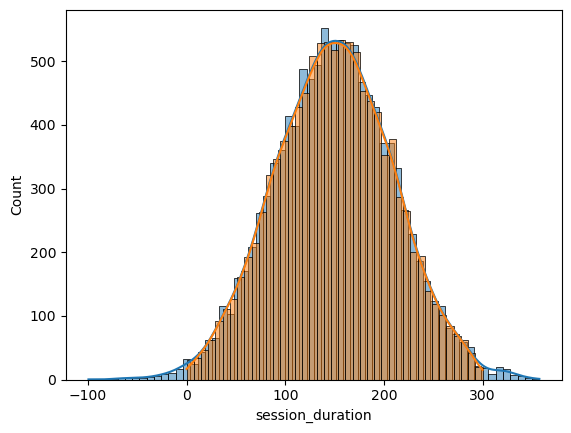

In [556]:
drop_outliers_performance('session_duration', 0, 300)

It follows from the data that the user spent a **negative time in the session**, which is essentially nonsense. Since it is not yet known reliably how to fight outliers, I will **temporarily** correct this error by **entering in the place of unreliable data NaN**.

#### PCT_DOUBLECLICK

Count replaced with NaN: 0.0409356689%.


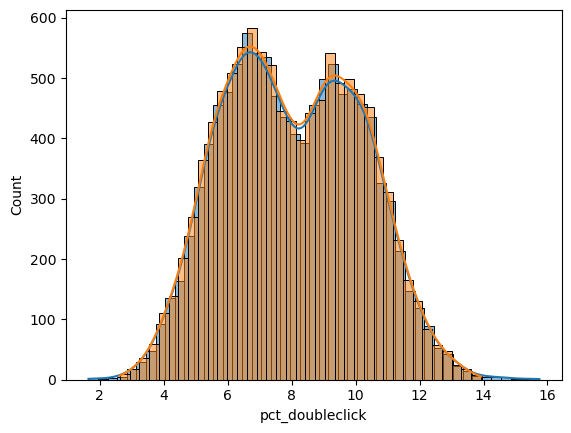

In [557]:
drop_outliers_performance('pct_doubleclick', 2.5, 14)

#### SCROLL_MOVE_TOTAL_REL_DISTANCE

Count replaced with NaN: 0.0265513045%.


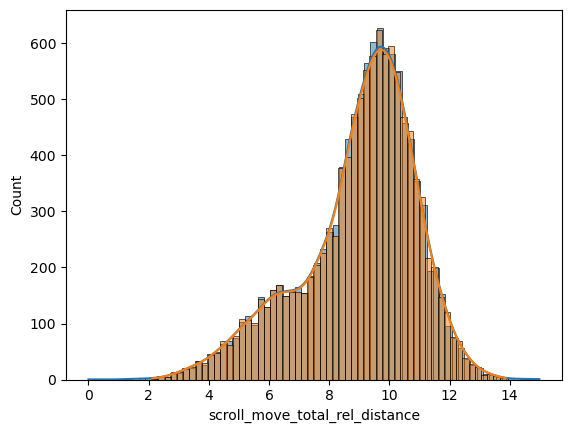

In [558]:
drop_outliers_performance('scroll_move_total_rel_distance', 2, 14)

#### PCT_CLICK

Count replaced with NaN: 0.0314842733%.


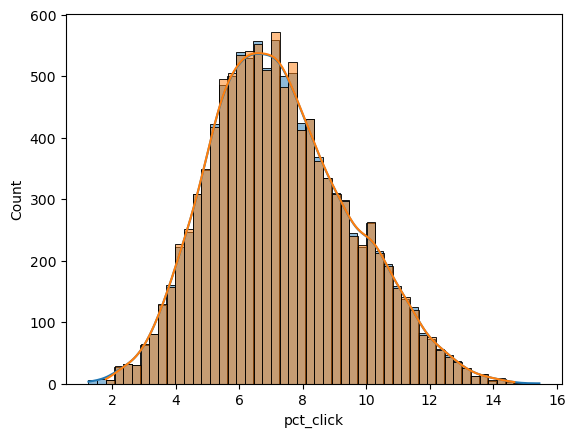

In [559]:
drop_outliers_performance('pct_click', 1.8, 14.8)

#### MOUSE_MOVE_TOTAL_REL_DISTANCE

Count replaced with NaN: 0.0354751368%.


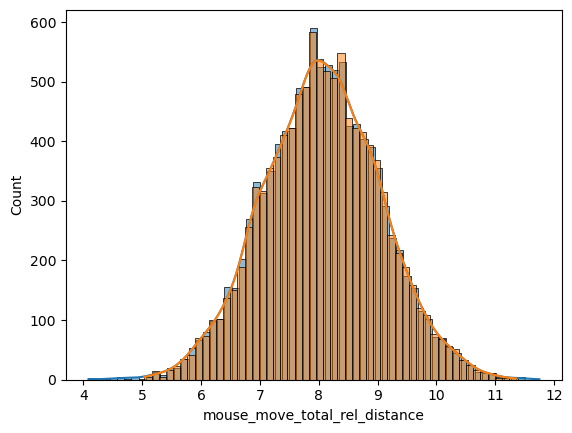

In [560]:
drop_outliers_performance('mouse_move_total_rel_distance', 5, 11.4)

#### PCT_MOUSE_CLICK

Count replaced with NaN: 0.0251765476%.


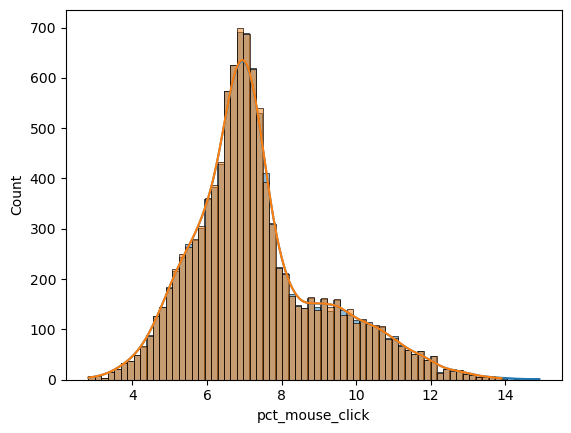

In [561]:
drop_outliers_performance('pct_mouse_click', 2.5, 14)

#### PAGE_ACTIVITY_DURATION

Count replaced with NaN: 0.0157408636%.


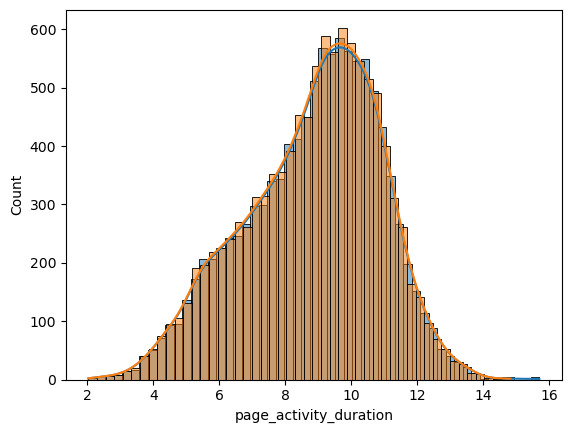

In [562]:
drop_outliers_performance('page_activity_duration', 2, 15)

#### BROWSER_NAME

<Axes: xlabel='browser_name', ylabel='Count'>

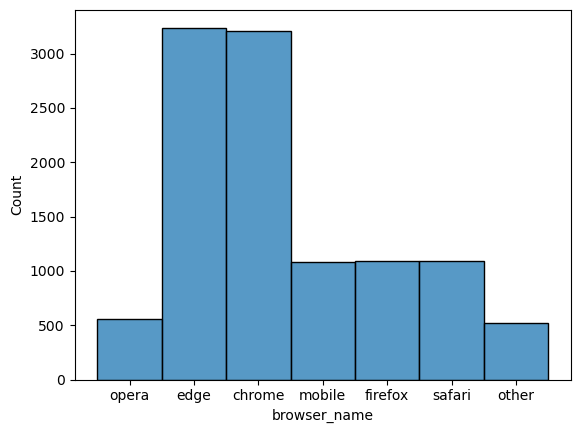

In [563]:
sns.histplot(session['browser_name'], kde=False)

### CONCLUSION IN OUTLAYER CORRECTION

Our goal was to partially clean up the dataset, so we did just that. In total, we cleaned the following number of rows:

In [564]:
print(f"Count of dropped: {counter_of_dropped_data}.\n Percentage: {counter_of_dropped_data / session_size * 100:.4f}%")
session

Count of dropped: 297.
 Percentage: 0.0136%


,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,pct_click,browser_name,pct_mouse_move,pct_click_product_info,...,pct_rage_click,scroll_move_total_rel_distance,user_id,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration,screen_resolution
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,6.95057,opera,6.03169,50.59959,...,27.21166,6.09851,868,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376,lower x 1080
1,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,7.19415,edge,5.84443,49.93366,...,47.46144,5.79315,1959,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608,lower x 768
2,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,9.56752,chrome,8.75647,32.96224,...,45.16742,9.26782,1587,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936,1280 x 1080
3,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,7.21841,mobile,5.68521,56.01077,...,51.15321,12.26355,2476,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937,1366 x 1024
4,6.10629,1.60295,8.34195,2019-12-26 10:34:30,1119598,0.0,7.92838,edge,7.76429,36.39425,...,55.01870,11.45785,16,0.88883,10.05772,8377930285275,62.92456,57.14864,9.85068,1024 x higher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10787,8.90701,3.24156,8.19275,2021-07-17 19:12:18,891391,1.0,8.86332,safari,9.86641,43.71919,...,49.90961,10.34860,681,0.08068,9.30304,2632912096956,47.04046,79.22789,5.91648,1366 x higher
10788,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,5.16977,mobile,8.28987,76.86145,...,39.86244,5.79656,445,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923,1280 x 768
10789,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,11.54376,mobile,11.46814,44.09592,...,35.09946,7.35456,1688,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022,1024 x 768
10790,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,4.38175,chrome,9.94778,60.98057,...,57.69495,8.65941,755,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471,1920 x 800


### DUPLICATES PROBLEMS

In [565]:
duplicates_session_count = session.apply(lambda x: x.duplicated().sum())
#duplicates_session_count

In [566]:
session = session.drop_duplicates(keep='first')
#session

### RESULT :

In [567]:
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,pct_click,browser_name,pct_mouse_move,pct_click_product_info,...,pct_rage_click,scroll_move_total_rel_distance,user_id,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration,screen_resolution
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,6.95057,opera,6.03169,50.59959,...,27.21166,6.09851,868,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376,lower x 1080
1,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,7.19415,edge,5.84443,49.93366,...,47.46144,5.79315,1959,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608,lower x 768
2,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,9.56752,chrome,8.75647,32.96224,...,45.16742,9.26782,1587,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936,1280 x 1080
3,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,7.21841,mobile,5.68521,56.01077,...,51.15321,12.26355,2476,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937,1366 x 1024
4,6.10629,1.60295,8.34195,2019-12-26 10:34:30,1119598,0.0,7.92838,edge,7.76429,36.39425,...,55.01870,11.45785,16,0.88883,10.05772,8377930285275,62.92456,57.14864,9.85068,1024 x higher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10786,7.51957,3.00637,7.02760,2022-04-17 11:26:23,424834,1.0,8.77933,edge,10.04616,78.76740,...,31.46144,9.95534,2206,0.76442,5.51938,9072355322039,41.86458,70.24703,9.79886,higher x 1080
10787,8.90701,3.24156,8.19275,2021-07-17 19:12:18,891391,1.0,8.86332,safari,9.86641,43.71919,...,49.90961,10.34860,681,0.08068,9.30304,2632912096956,47.04046,79.22789,5.91648,1366 x higher
10789,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,11.54376,mobile,11.46814,44.09592,...,35.09946,7.35456,1688,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022,1024 x 768
10790,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,4.38175,chrome,9.94778,60.98057,...,57.69495,8.65941,755,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471,1920 x 800


## PRODUCT ALALYSING

In [568]:
product

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila
...,...,...,...,...
14953,6077115675137,US,Fairview Heights,America/Chicago
14954,8549791867352,DE,Ehingen,Europe/Berlin
14955,8931618033734,RU,Tyoply Stan,Europe/Moscow
14956,3259372694448,RU,Mikhaylovka,Europe/Volgograd


In [569]:
product[['region', 'city']] = product['location'].str.split('/', n=1, expand=True)
product = product.drop(['store_name', 'location'], axis=1)
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


### NAN PROBLEMS

In [570]:
product.isna().sum()

product_ean     0
code           17
region          0
city            0
dtype: int64

In [571]:
product = product.dropna()
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


### OUTLAYER PROBLEMS

### DUPLICATES PROBLEMS

In [572]:
product = product.drop_duplicates(keep='first')

In [573]:
product['product_ean'].duplicated().sum()

0

In [574]:
product['region'].duplicated().sum()
uniq_reg = product['region'].unique()
uniq_reg

array(['America', 'Asia', 'Europe', 'Africa', 'Australia', 'Pacific',
       'Atlantic', 'Indian'], dtype=object)

In [575]:
matching_rows = product[product['region'] == 'Pacific']
matching_rows

,product_ean,code,region,city
35,1920866758589,NZ,Pacific,Auckland
155,6059445329478,US,Pacific,Honolulu
233,3614297309547,PG,Pacific,Port_Moresby
326,7737036803567,PG,Pacific,Port_Moresby
472,4172859785264,NZ,Pacific,Auckland
...,...,...,...,...
14289,8301916139047,NZ,Pacific,Auckland
14404,6407588828219,PG,Pacific,Port_Moresby
14427,4981889226957,PG,Pacific,Port_Moresby
14512,4617494512528,US,Pacific,Honolulu


<Axes: xlabel='region', ylabel='Count'>

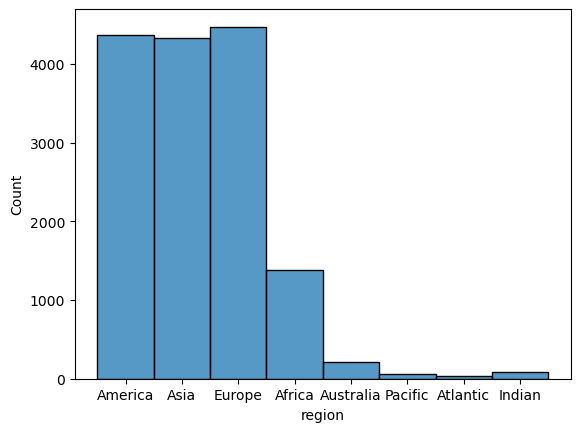

In [576]:
sns.histplot(product['region'])

In [577]:
def check_count_of_region_attr(region):
    attribute_counts = product['region'].value_counts()
    count_of_defined_attribute = attribute_counts.get(region, 0)
    return f"{region}: {count_of_defined_attribute} times."

for region in uniq_reg:
    print(check_count_of_region_attr(region))

America: 4373 times.
Asia: 4329 times.
Europe: 4474 times.
Africa: 1376 times.
Australia: 210 times.
Pacific: 61 times.
Atlantic: 38 times.
Indian: 80 times.


### RESULT :

In [578]:
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


## CONCLUSION. WHAT WAS CHANGED?

In [579]:
user_start = pd.read_csv("dataset_iau/user.csv", sep='\t')
session_start = pd.read_csv("dataset_iau/session.csv", sep='\t')
product_start = pd.read_csv("dataset_iau/product.csv", sep='\t')

In [580]:
user_start.head()

,residence,sex,username,user_id,address,birthdate,race,job,name,current_location,mail
0,NaN,F,vigorellimatilda,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",1917-03-25,NaN,NaN,Gemma Baracca,NaN,cesarecagnotto@tim.it
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,matsumotoasuka,298,三重県西東京市上広谷3丁目27番1号,NaN,NaN,演歌歌手,近藤 翼,"(Decimal('44.4329015'), Decimal('-94.188145'))",nakajimaatsushi@yahoo.com
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,debra19,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868",1985-05-21,white,Tourism officer,Belinda Harvey,"(Decimal('17.674891'), Decimal('43.063751'))",kevindeleon@yahoo.com
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,udineseimelda,2538,NaN,2012-01-02,asian,NaN,Sig.ra Susanna Roero,"(Decimal('-65.4578585'), Decimal('-162.734373'))",federicacaccioppoli@tele2.it
4,NaN,NaN,debra72,590,USCGC Kim\r\nFPO AA 25581,NaN,white,NaN,Deborah Larson,"(Decimal('-67.907028'), Decimal('-104.061594'))",stevendavis@yahoo.com


In [581]:
user_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   residence         890 non-null    object
 1   sex               1271 non-null   object
 2   username          2542 non-null   object
 3   user_id           2542 non-null   int64 
 4   address           2161 non-null   object
 5   birthdate         1398 non-null   object
 6   race              763 non-null    object
 7   job               1017 non-null   object
 8   name              2542 non-null   object
 9   current_location  2415 non-null   object
 10  mail              2542 non-null   object
dtypes: int64(1), object(10)
memory usage: 218.6+ KB


In [582]:
user.head()

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN


In [583]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   residence         888 non-null    object 
 1   sex               1267 non-null   object 
 2   user_id           2467 non-null   int64  
 3   address           2141 non-null   object 
 4   current_location  2374 non-null   object 
 5   age               1393 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 134.9+ KB


In [584]:
session_start.head()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937


In [585]:
session_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   screen_width                    11089 non-null  object 
 7   pct_click                       11078 non-null  float64
 8   browser_name                    11089 non-null  object 
 9   pct_mouse_move                  11078 non-null  float64
 10  pct_click_product_info          11078 non-null  float64
 11  pct_scroll_move_duration        11078 non-null  float64
 12  pct_scrandom                    

In [586]:
session.head()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,pct_click,browser_name,pct_mouse_move,pct_click_product_info,...,pct_rage_click,scroll_move_total_rel_distance,user_id,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration,screen_resolution
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,6.95057,opera,6.03169,50.59959,...,27.21166,6.09851,868,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376,lower x 1080
1,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,7.19415,edge,5.84443,49.93366,...,47.46144,5.79315,1959,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608,lower x 768
2,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,9.56752,chrome,8.75647,32.96224,...,45.16742,9.26782,1587,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936,1280 x 1080
3,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,7.21841,mobile,5.68521,56.01077,...,51.15321,12.26355,2476,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937,1366 x 1024
4,6.10629,1.60295,8.34195,2019-12-26 10:34:30,1119598,0.0,7.92838,edge,7.76429,36.39425,...,55.01870,11.45785,16,0.88883,10.05772,8377930285275,62.92456,57.14864,9.85068,1024 x higher


In [587]:
session.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10662 entries, 0 to 10791
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 10662 non-null  float64
 1   total_load_time                 10662 non-null  float64
 2   mouse_move_total_rel_distance   10662 non-null  float64
 3   session_start                   10662 non-null  object 
 4   session_id                      10662 non-null  int64  
 5   ack                             10662 non-null  float64
 6   pct_click                       10662 non-null  float64
 7   browser_name                    10662 non-null  object 
 8   pct_mouse_move                  10651 non-null  float64
 9   pct_click_product_info          10651 non-null  float64
 10  pct_scroll_move_duration        10651 non-null  float64
 11  pct_scrandom                    10652 non-null  float64
 12  session_duration                

In [588]:
product_start.head()

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila


In [589]:
product_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14958 entries, 0 to 14957
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_ean  14958 non-null  int64 
 1   code         14941 non-null  object
 2   store_name   14958 non-null  object
 3   location     14958 non-null  object
dtypes: int64(1), object(3)
memory usage: 467.6+ KB


In [590]:
product.head()

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila


In [591]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14941 entries, 0 to 14957
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_ean  14941 non-null  int64 
 1   code         14941 non-null  object
 2   region       14941 non-null  object
 3   city         14941 non-null  object
dtypes: int64(1), object(3)
memory usage: 583.6+ KB
